In [29]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=sns.load_dataset("iris")


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 
3.a.Function for calculating distances (Euclidean and Manhattan)

In [14]:
#euclidean distance
def euclidean(x_train,x_test,y_train,kn):
    y_pred=[]
    for i in x_test:
        dist=[]
        m=0
        for j in x_train:
            s=0
            for k in range(len(j)):
                s+=(pow(i[k]-j[k],2))
            dist.append((math.sqrt(s),m))
            m+=1
        dist.sort(key=lambda x:x[0])
        d={}
        for l in range(kn):
            if(y_train[dist[l][1]][0] not in d):
                d[y_train[dist[l][1]][0]]=1
            else:
                d[y_train[dist[l][1]][0]]+=1
         #print(d,max(d.values()))
        for l in d:
            if(d[l]==max(d.values())):
                y_pred.append(l)
                break
    return y_pred

In [15]:
#Manhatten distance
def manhattan(x_train,x_test,y_train,kn):
    y_pred=[]
    for i in x_test:
        dist=[]
        m=0
        for j in x_train:
            s=0
            for k in range(len(j)):
                s+=abs(i[k]-j[k])
            dist.append((s,m))
            m+=1
        dist.sort(key=lambda x:x[0])
        d={}
        for l in range(kn):
            if(y_train[dist[l][1]][0] not in d):
                d[y_train[dist[l][1]][0]]=1
            else:
                d[y_train[dist[l][1]][0]]+=1
     #print(d,max(d.values()))
        for l in d:
            if(d[l]==max(d.values())):
                y_pred.append(l)
                break
    return y_pred

In [27]:
def KNN(df):
    X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    Y=df[['species']].values
     
    
     #80:20 Split of DataSet
    
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)
    data=[]
     
      #Repeating For various K values
     
    for i in range(2,int(math.sqrt(df.shape[0]))):
        y_pred_e=euclidean(x_train,x_test,y_train,i)
        y_pred_m=manhattan(x_train,x_test,y_train,i)
        u=[i,accuracy_score(y_test,y_pred_e),accuracy_score(y_test,y_pred_m)]
        data.append(u)
    Dist_Accuracy=pd.DataFrame(data,columns=['K_Value', 'Euclidean_Accuracy', 'Manhattan_Accuracy'])
    data=[]
 
    
    #Repeating For various K values using Inbuilt packages-scikitlearn
    
    for i in range(2,int(math.sqrt(df.shape[0]))):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_test)
        u=[i,accuracy_score(y_test,y_pred)]
        data.append(u)
    Inbuilt_Accuracy=pd.DataFrame(data,columns=['K_Value', 'InbuiltFunction_Accuracy'])
    return Dist_Accuracy,Inbuilt_Accuracy


In [28]:
Dist_Accuracy,Inbuilt_Accuracy=KNN(df)

<ipython-input-27-2f4e493c3b39>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-27-2f4e493c3b39>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-27-2f4e493c3b39>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-27-2f4e493c3b39>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)
<ipython-input-27-2f4e493c3b39>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

accuracy

In [30]:
Dist_Accuracy

,K_Value,Euclidean_Accuracy,Manhattan_Accuracy
0,2,0.933333,0.900000
1,3,0.933333,0.933333
2,4,0.933333,0.933333
3,5,0.933333,0.966667
4,6,0.966667,0.966667
5,7,0.933333,0.933333
6,8,0.966667,0.900000
7,9,0.933333,0.900000
8,10,0.900000,0.900000
9,11,0.933333,0.900000


graphs

<AxesSubplot:xlabel='K_Value'>

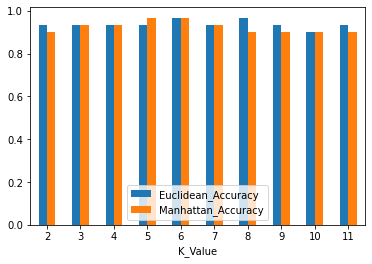

In [32]:
Dist_Accuracy.plot.bar(x='K_Value',y=['Euclidean_Accuracy','Manhattan_Accuracy'],rot=0)